In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SsfOVlIroU_M5jXvXjB9yfvVOAa5M06gotnm47dmQpRR',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-gb.cloud-object-storage.appdomain.cloud')

bucket = 'ibmhcdeploy-donotdelete-pr-psyhpmee2axrcu'
object_key = 'Identifying Patterns and Trends in Campus Placement Data (1).csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()



,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [35]:
df.shape

(2966, 8)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [37]:
df.isnull().any()

Age                  False
Gender               False
Stream               False
Internships          False
CGPA                 False
Hostel               False
HistoryOfBacklogs    False
PlacedOrNot          False
dtype: bool

In [38]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [39]:
df['Stream'].value_counts()

Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64

<AxesSubplot:xlabel='Stream', ylabel='count'>

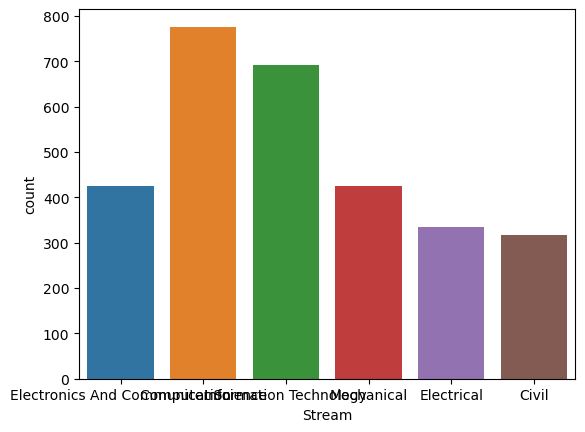

In [40]:
sns.countplot(x='Stream',data=df)

In [41]:
#encoding

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
le = LabelEncoder()
df['StreamLabelEncoder'] = le.fit_transform(df['Stream'])
df['GenderLabelEncoder'] = le.fit_transform(df['Gender'])
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,StreamLabelEncoder,GenderLabelEncoder
0,22,Male,Electronics And Communication,1,8,1,1,1,3,1
1,21,Female,Computer Science,0,7,1,1,1,1,0
2,22,Female,Information Technology,1,6,0,0,1,4,0
3,21,Male,Information Technology,0,8,0,1,1,4,1
4,22,Male,Mechanical,0,8,1,0,1,5,1
...,...,...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0,4,1
2962,23,Male,Mechanical,1,7,1,0,0,5,1
2963,22,Male,Information Technology,1,7,0,0,0,4,1
2964,22,Male,Computer Science,1,7,0,0,0,1,1


In [44]:
#removing columns

In [45]:
df = df.drop(['Stream','Gender'],axis=1)

In [46]:
df

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot,StreamLabelEncoder,GenderLabelEncoder
0,22,1,8,1,1,1,3,1
1,21,0,7,1,1,1,1,0
2,22,1,6,0,0,1,4,0
3,21,0,8,0,1,1,4,1
4,22,0,8,1,0,1,5,1
...,...,...,...,...,...,...,...,...
2961,23,0,7,0,0,0,4,1
2962,23,1,7,1,0,0,5,1
2963,22,1,7,0,0,0,4,1
2964,22,1,7,0,0,0,1,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 2966 non-null   int64
 1   Internships         2966 non-null   int64
 2   CGPA                2966 non-null   int64
 3   Hostel              2966 non-null   int64
 4   HistoryOfBacklogs   2966 non-null   int64
 5   PlacedOrNot         2966 non-null   int64
 6   StreamLabelEncoder  2966 non-null   int64
 7   GenderLabelEncoder  2966 non-null   int64
dtypes: int64(8)
memory usage: 185.5 KB


In [48]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [49]:
ss = StandardScaler()
ss.fit_transform(df)

array([[ 0.38813058,  0.40044544,  0.95719068, ...,  0.89979999,
         0.26465478,  0.44540301],
       [-0.36675158, -0.95077319, -0.07631043, ...,  0.89979999,
        -0.9448461 , -2.24515772],
       [ 0.38813058,  0.40044544, -1.10981154, ...,  0.89979999,
         0.86940522, -2.24515772],
       ...,
       [ 0.38813058,  0.40044544, -0.07631043, ..., -1.11135809,
         0.86940522,  0.44540301],
       [ 0.38813058,  0.40044544, -0.07631043, ..., -1.11135809,
        -0.9448461 ,  0.44540301],
       [ 1.14301273, -0.95077319,  0.95719068, ...,  0.89979999,
        -1.54959654,  0.44540301]])

##Machine Learning
splitting of data

In [50]:
x = df.drop(['PlacedOrNot'],axis=1)
x

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,StreamLabelEncoder,GenderLabelEncoder
0,22,1,8,1,1,3,1
1,21,0,7,1,1,1,0
2,22,1,6,0,0,4,0
3,21,0,8,0,1,4,1
4,22,0,8,1,0,5,1
...,...,...,...,...,...,...,...
2961,23,0,7,0,0,4,1
2962,23,1,7,1,0,5,1
2963,22,1,7,0,0,4,1
2964,22,1,7,0,0,1,1


In [51]:
x["Age"]=x["Age"].astype("float")
x["Internships"]=x["Internships"].astype("float")
x["CGPA"]=x["CGPA"].astype("float")
x["Hostel"]=x["Hostel"].astype("float")
x["HistoryOfBacklogs"]=x["HistoryOfBacklogs"].astype("float")
x["StreamLabelEncoder"]=x["StreamLabelEncoder"].astype("float")
x["GenderLabelEncoder"]=x["GenderLabelEncoder"].astype("float")
x

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,StreamLabelEncoder,GenderLabelEncoder
0,22.0,1.0,8.0,1.0,1.0,3.0,1.0
1,21.0,0.0,7.0,1.0,1.0,1.0,0.0
2,22.0,1.0,6.0,0.0,0.0,4.0,0.0
3,21.0,0.0,8.0,0.0,1.0,4.0,1.0
4,22.0,0.0,8.0,1.0,0.0,5.0,1.0
...,...,...,...,...,...,...,...
2961,23.0,0.0,7.0,0.0,0.0,4.0,1.0
2962,23.0,1.0,7.0,1.0,0.0,5.0,1.0
2963,22.0,1.0,7.0,0.0,0.0,4.0,1.0
2964,22.0,1.0,7.0,0.0,0.0,1.0,1.0


In [52]:
y = df['PlacedOrNot']
y=y.astype("float")
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2961    0.0
2962    0.0
2963    0.0
2964    0.0
2965    1.0
Name: PlacedOrNot, Length: 2966, dtype: float64

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=16)

In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [55]:
y_pred = model.predict(x_test)
y_pred

array([1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1., 0.

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 87.37373737373737


In [58]:
import pickle

In [59]:
pickle.dump(model,open('classification_model.pkl','wb'))

In [60]:
!pip install -U ibm-watson-machine-learning

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.9 MB/s eta 0:00:0000:01
  Attempting uninstall: ibm-watson-machine-learning
    Found existing installation: ibm-watson-machine-learning 1.0.316
    Uninstalling ibm-watson-machine-learning-1.0.316:
      Successfully uninstalled ibm-watson-machine-learning-1.0.316


In [61]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [62]:
wml_credentials={
    "apikey":"g8Z5oDQDISrVy9Tvr-U-fTUWs0XZEYfawawjrL-sGjdu",
    "url":"https://eu-gb.ml.cloud.ibm.com"
}

In [63]:
wml_client = APIClient(wml_credentials)

In [64]:
wml_client.spaces. list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -----------------  ------------------------
ID                                    NAME               CREATED
b41992c7-d61b-42c0-abd1-1f5df1a32c9b  IBM_HC_deployment  2023-08-31T09:04:40.903Z
------------------------------------  -----------------  ------------------------


,ID,NAME,CREATED
0,b41992c7-d61b-42c0-abd1-1f5df1a32c9b,IBM_HC_deployment,2023-08-31T09:04:40.903Z


In [65]:
SPACE_ID="b41992c7-d61b-42c0-abd1-1f5df1a32c9b"

In [66]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [67]:
MODEL_NAME='demoModel'
DEPLOYMENT_NAME='demoModelDep'
BEST_MODEL=model

In [68]:
software_spec_uid=wml_client.software_specifications.get_id_by_name('runtime-22.2-py3.10')

In [69]:
model_props={
    wml_client.repository.ModelMetaNames.NAME:MODEL_NAME,
     wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_1.1',
     wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
    
}

In [70]:
model_details=wml_client.repository.store_model(
    model=BEST_MODEL,
    meta_props=model_props,
    training_data=x_train,
    training_target=y_train
)

In [71]:
model_uid=wml_client.repository.get_model_id(model_details)
model_uid

'2cff38ba-6edd-4ec2-8cbc-b959ca9398ed'

In [72]:
deployment_props={
      wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME,
    wml_client.deployments.ConfigurationMetaNames.ONLINE:{}
}

In [73]:
deployment1=wml_client.deployments.create(
    artifact_uid=model_uid,
    meta_props=deployment_props
)



#######################################################################################

Synchronous deployment creation for uid: '2cff38ba-6edd-4ec2-8cbc-b959ca9398ed' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='d17a02db-85af-43c8-9090-89ccf25e2d16'
------------------------------------------------------------------------------------------------


